In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('customer_data.csv')

In [4]:
df.head(2)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6


In [5]:
df.tail(2)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5
99999,100000,35,Female,22249,College,West,Silver,rare,9426,Health,0,6


In [6]:
df.shape

(100000, 12)

In [7]:
df.dtypes

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

In [8]:
df.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [9]:
df.nunique()

id                    100000
age                       38
gender                     2
income                 40003
education                  4
region                     4
loyalty_status             3
purchase_frequency         3
purchase_amount        18902
product_category           7
promotion_usage            2
satisfaction_score        11
dtype: int64

In [10]:
df.drop(columns='promotion_usage',inplace=True)

In [11]:
df.drop(columns='id',inplace=True)

In [12]:
df.sample(5)

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,satisfaction_score
24955,29,Male,43260,College,East,Silver,rare,17694,Food,5
23283,37,Female,42193,College,East,Silver,frequent,14845,Electronics,6
91147,34,Female,40141,College,North,Regular,occasional,13411,Health,5
96006,34,Male,12628,College,West,Regular,occasional,4196,Food,6
93326,23,Female,25416,Bachelor,East,Regular,occasional,10190,Clothing,7


In [13]:
gender=df['gender'].value_counts()
gender

gender
Female    50074
Male      49926
Name: count, dtype: int64

In [14]:
education=df['education'].value_counts()
education

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

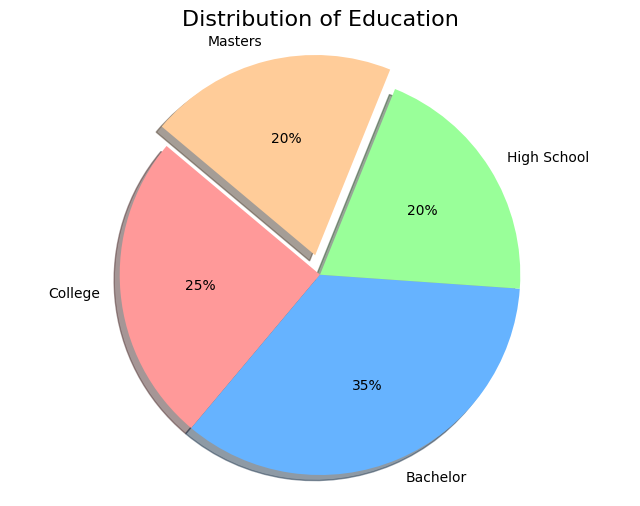

In [20]:
education = [25, 35, 20, 20]
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0, 0, 0, 0.1)
plt.pie(education, autopct='%1.0f%%', labels=['College', 'Bachelor', 'High School', 'Masters'], explode=explode, colors=colors, shadow=True, startangle=140)
plt.title('Distribution of Education', fontsize=16)
plt.axis('equal')
plt.show()

In the pie chart, the "Bachelor" category has the highest percentage, which is 35%.

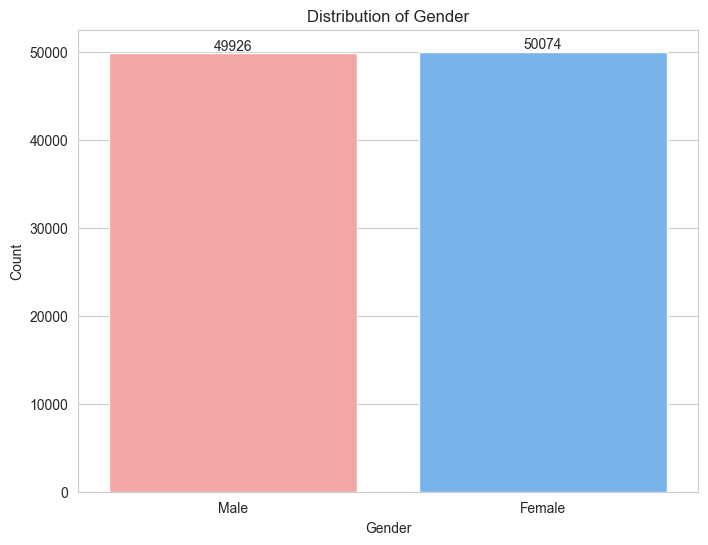

In [30]:
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff']
ax = sns.countplot(x='gender', data=df, palette=colors)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The bar graph shows that the gender counts are quite similar.

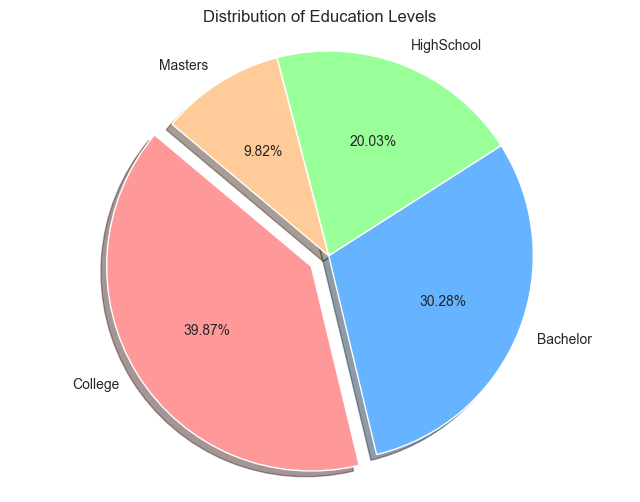

In [33]:
x = df['education'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0, 0)
plt.figure(figsize=(8, 6))
plt.pie(x.values, 
        labels=x.index, 
        autopct='%1.2f%%', 
        colors=colors,
        explode=explode,
        shadow=True,
        startangle=140)
plt.title('Distribution of Education Levels')
plt.axis('equal')
plt.show()

The chart suggests that College education makes up the biggest share, at roughly 39%, while Masters education comprises the smallest, at about 9%.

In [34]:
df['region'].value_counts()

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

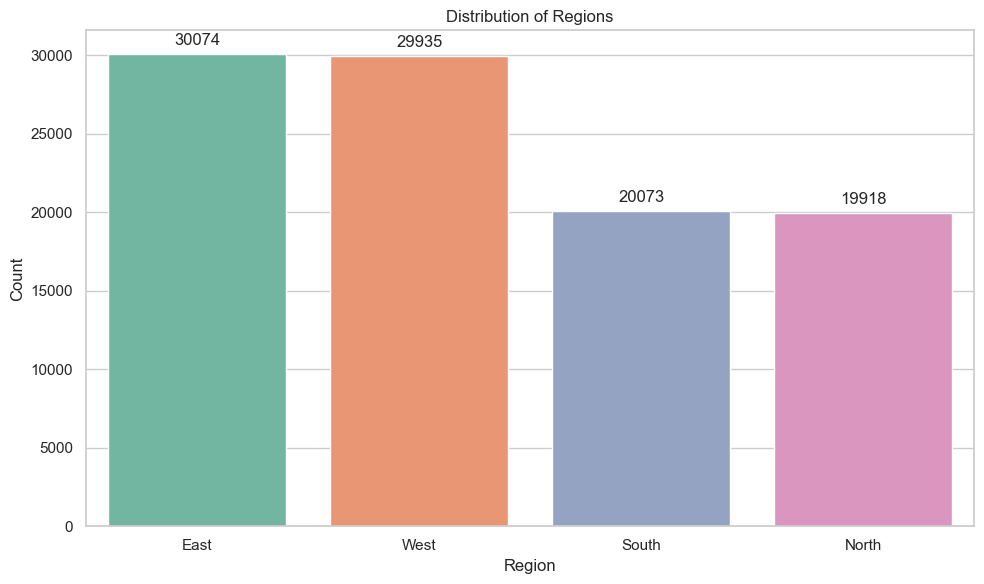

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='region', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The chart clearly indicates that the regions labeled 'East' and 'West' have the most counts.

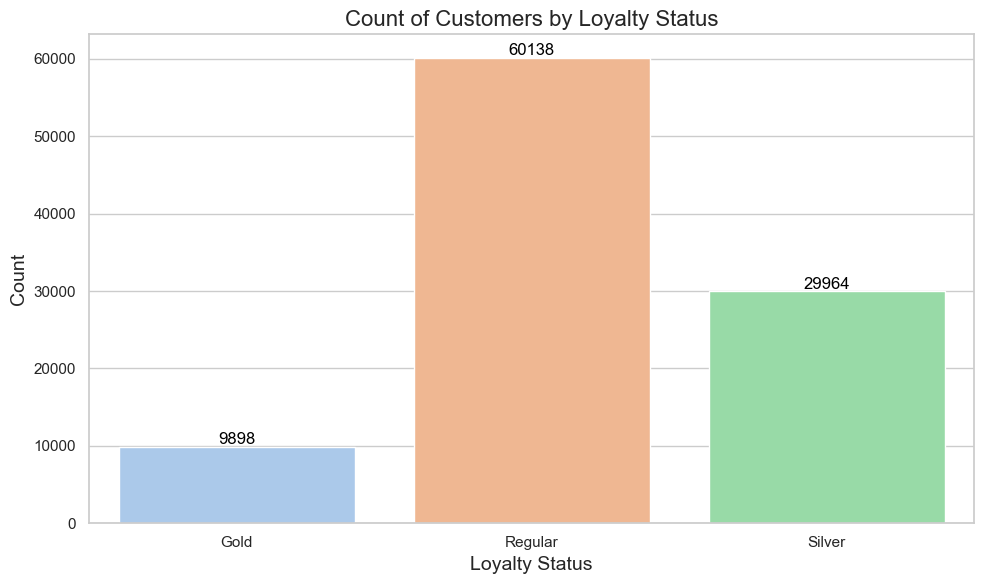

In [46]:
df['loyalty_status'] = df['loyalty_status'].astype(str).replace('\.0', '', regex=True)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='loyalty_status', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xlabel('Loyalty Status', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Count of Customers by Loyalty Status', fontsize=16)

plt.tight_layout()
plt.show()

Regular customers have a higher loyalty status compared to Gold and Silver customers.

In [47]:
df.describe()

,age,income,purchase_amount,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,30.003260,27516.269880,9634.790840,5.009650
std,4.480535,12996.782587,4799.339449,1.038714
min,12.000000,5000.000000,1118.000000,0.000000
25%,27.000000,16271.750000,5583.000000,4.000000
50%,30.000000,27584.500000,9452.000000,5.000000
75%,33.000000,38747.250000,13350.000000,6.000000
max,49.000000,50000.000000,26204.000000,10.000000


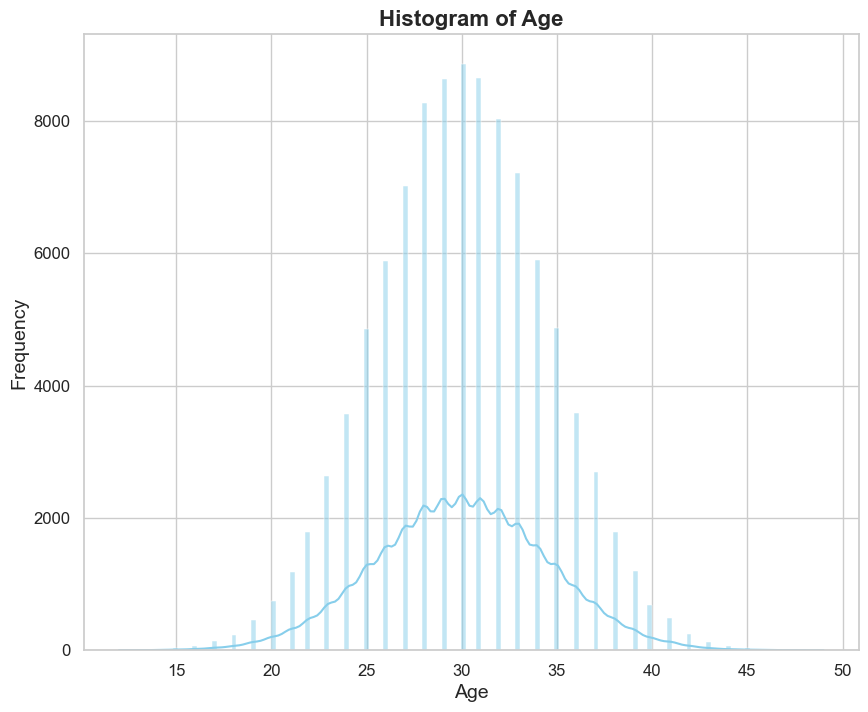

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Histogram of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

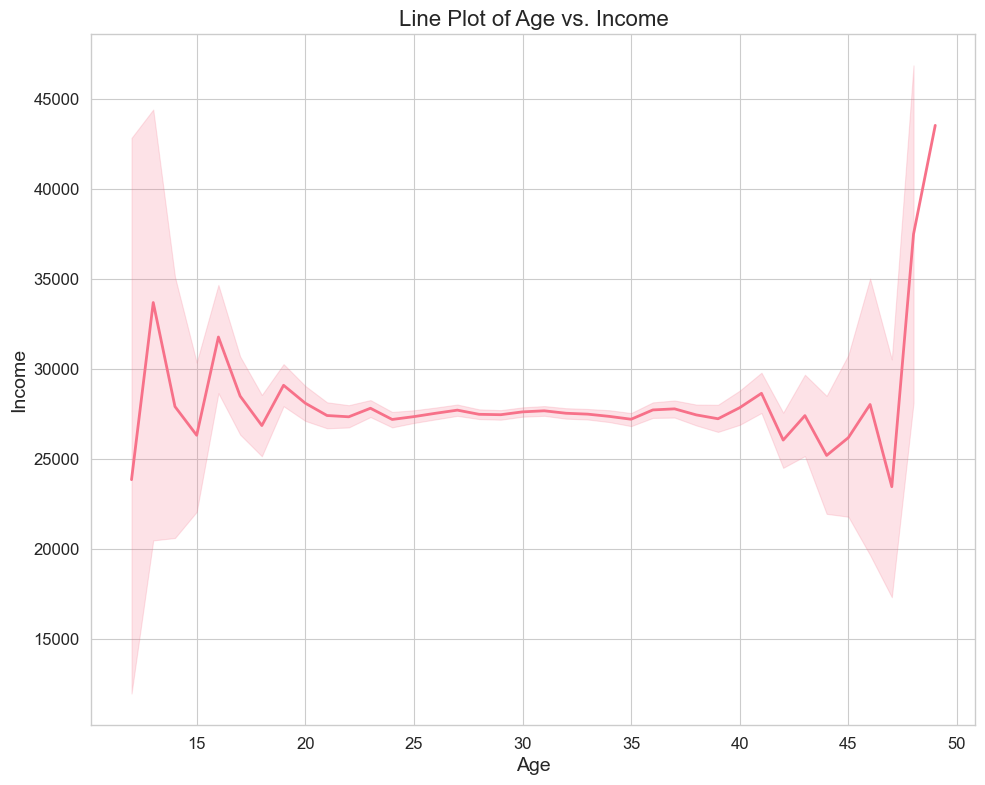

In [53]:
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.lineplot(x='age', y='income', data=df, linewidth=2)
plt.title('Line Plot of Age vs. Income', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()